## Sampling from Disparity Space

We may choose to sample in disparity space which will give higher priority to the region closer to the camera (near plane) than the region further away from the camera.

We will focus more samples on near-depth area. This is because objects closer to the camera are more critical for visual fidelity and accuracy.

#### Notation:
* `near`: the near depth closer to the camera
* `far`: the maximum depth farthest from the camera
* `z`: depth
* `disparity`: ${disparity} = 1/{z}$

#### Interpolating disparity between near and far planes
1. Uniform sampling for N samples
2. Interpolate disparity between near and far planes
3. Compute disparity
4. Compute depth or `z`


\begin{flalign*}
u_i &= \frac{i}{N-1}, \quad i = 0, 1, 2, \dots, N-1 && \\
\text{disparity} &= (1-u) \cdot \frac{1}{\text{near}} + u \cdot \frac{1}{\text{far}} && \\
z &= \frac{1}{\text{disparity}} &&
\end{flalign*}


In [1]:
import torch

# Define near plane, far plane, num samples
near = torch.tensor([[1.0]])  # Shape: (1, 1)
far = torch.tensor([[10.0]])  # Shape: (1, 1)
N_samples = 10
perturb = 0.1

# Uniform sampling N sample points along ray
u = torch.linspace(0, 1, N_samples)
z = 1 / ((1 / near) * (1 - u) + (1 / far) * u)

z_mid = (z[:, :-1] + z[:, 1:]) / 2
z_lower = torch.hstack([z[:, :1], z_mid]) # {z[0], z_mid}
z_upper = torch.hstack([z_mid, z[:, -1:]]) # {z_mid, z[0]}
delta = z_upper - z_lower

z = z_lower + (perturb * torch.rand_like(z)) * delta

In [2]:
print(z)
print(z.shape)

tensor([[1.0020, 1.0628, 1.1905, 1.3470, 1.5581, 1.8666, 2.2827, 2.9505, 4.2803,
         7.5278]])
torch.Size([1, 10])


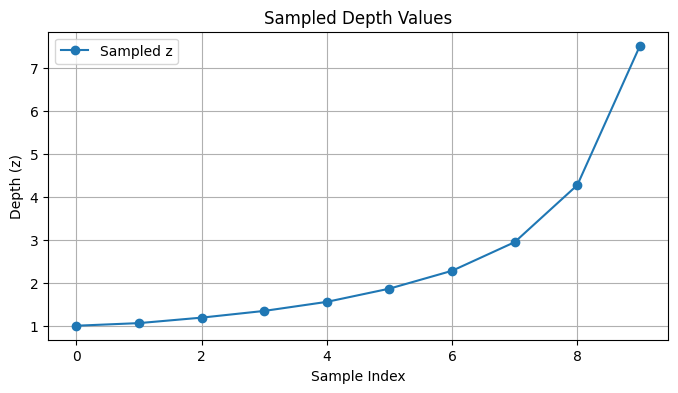

In [3]:
import matplotlib.pyplot as plt

z_values = z[0]

plt.figure(figsize=(8, 4))
plt.plot(range(N_samples), z_values, marker="o", label="Sampled z")
plt.title("Sampled Depth Values")
plt.xlabel("Sample Index")
plt.ylabel("Depth (z)")
plt.legend()
plt.grid(True)
plt.show()